IMPORTING

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT ATHLETES OLYMPICS RAW DATA  USING URL


In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/Olympics-Dataset/refs/heads/master/athletes/bios.csv")

CREATE NEW DATAFRAME AND COPY THE DATA


In [6]:
df = data


# CHECKING THE DTYPES AND INFO

df.dtypes
df.info()

CHECKING THE DUPLICATE VALUES ON ATHELETE_ID (THIS IS THE IMPORTANT COLUMNS ON THIS DATA AND VALUE ON THIS COLUMN  CAN'T BE DUPLICATED AND NULL )

In [10]:
#CHECKING THE NULL VALUES ON ATHLETE I_D COLUMNS
df['athlete_id'].isnull().sum()
#CHECKING DUPLICATED VALUES ON ATHLETE I_D COLUMNS
df['athlete_id'].duplicated().sum()


0

# RENAMING THE DataFrame COLUMNS AND REPLACING THE SPACE INTO UNDERLINE

In [12]:
df.columns
df = df.rename(columns={'Full name' : 'Full_Name','athlete_id':'Athlete_id','Other names': 'Other_Names',
                        'Original name': 'Original_Name','Name order':'Name_order','Used name':'Used_Name'})


# REMOVING BULLET POINT • ON Full_Name AND Used_Name columns


In [14]:
df['Used_Name'] = df['Used_Name'].str.replace('•',' ')
df['Full_Name'] = df['Full_Name'].str.replace('•',' ')
df.head()
#  AND ALSO - TO SPACE
df['Full_Name'] = df['Full_Name'].str.replace('-',' ')

# SPLIT THE MEASUREMENTS COLUMNS TO HEIGHT_CM & WEIGHT_KG  COLUMNS AND CHANGE THE DTYPES TO NUMERIC

In [16]:
df[['Height_cm','Weight_kg'] ]= df['Measurements'].str.split("/",expand=True)
df['Height_cm'] = pd.to_numeric(df['Height_cm'].str.strip(" cm"),errors='coerce')
df['Weight_kg'] = pd.to_numeric(df['Weight_kg'].str.strip(' kg'),errors='coerce')



In [17]:
# AND AFTER THAT I'M GONNA DROP THE MEASUREMENTS COLUMNS BECAUSE I ALREADY SPLITTED THE HEIGHT AND CM
df = df.drop(columns=['Measurements'],axis=0)

# EXTRACT BORN AND DIED COLUMNS AND CHANGE THE DATA TYPES TO DATETIME

In [19]:
df['Birth_Year'] = df['Born'].str.extract(r'(\d+ \w+ \d{4})')
df['Died_Year'] = df['Died'].str.extract(r'(\d+ \w+ \d{4})')
df['Birth_Year'] = pd.to_datetime(df['Birth_Year'],format='mixed',errors='coerce')
df['Died_Year'] = pd.to_datetime(df['Died_Year'],format='mixed',errors='coerce')


# EXTRACT AND CREATE CITY,REGION AND COUNTRY COLUMN

In [21]:
df['Born'] = df['Born'].str.replace('(', '')
df['Born'] = df['Born'].str.replace(')', '')

df[['City','Region','Country']] = df['Born'].str.extract(r'in ([\w\s-]+), ([\w\s-]+) (\w+)',expand=True)



# DROP UNIMPORTANT COLUMNS 

In [23]:
df.head(2) 
df.drop(columns=['Born','Died','Affiliations','Original_Name','Other_Names','Nick/petnames','Nationality','Title(s)'],inplace=True)

In [24]:
df.head()

,Roles,Sex,Full_Name,Used_Name,NOC,Athlete_id,Name_order,Height_cm,Weight_kg,Birth_Year,Died_Year,City,Region,Country
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean François"" ...",Jean-François Blanchy,France,1,NaN,NaN,NaN,1886-12-12,1960-10-02,Bordeaux,Gironde,FRA
1,Competed in Olympic Games,Male,Arnaud Benjamin Boetsch,Arnaud Boetsch,France,2,NaN,183.0,76.0,1969-04-01,NaT,Meulan,Yvelines,FRA
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert Borotra,Jean Borotra,France,3,NaN,183.0,76.0,1898-08-13,1994-07-17,Biarritz,Pyrénées-Atlantiques,FRA
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean Brugnon,Jacques Brugnon,France,4,NaN,168.0,64.0,1895-05-11,1978-03-20,Paris VIIIe,Paris,FRA
4,Competed in Olympic Games,Male,Henry Albert Canet,Albert Canet,France,5,NaN,NaN,NaN,1878-04-17,1930-07-25,Wandsworth,England,GBR


# ANALYZING THE CLEAN DATA

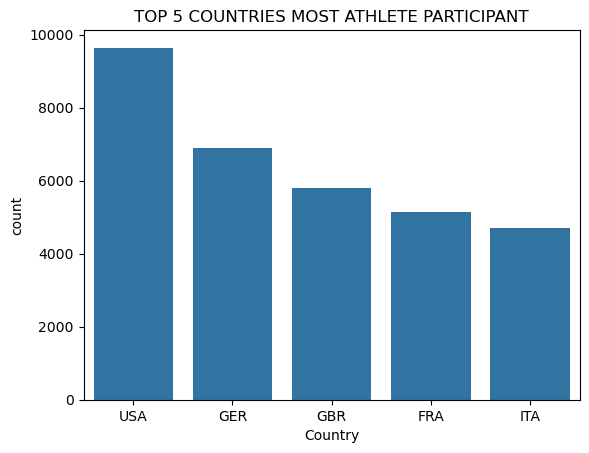

In [26]:
#TOP 5 COUNTRIES MOST ATHELETES PARTICIPANT IN OLYMPICS
df['count'] = 1
top5 = df.groupby('Country')['count'].sum().sort_values(ascending=False).head(5)
top5 = pd.DataFrame(top5)


sns.barplot(x=top5.index,y='count',data=top5)
plt.title("TOP 5 COUNTRIES MOST ATHLETE PARTICIPANT")
plt.show()

# TALLEST ATHLETE IN OLYMPICS

In [28]:
df.nlargest(1,'Height_cm')

,Roles,Sex,Full_Name,Used_Name,NOC,Athlete_id,Name_order,Height_cm,Weight_kg,Birth_Year,Died_Year,City,Region,Country,count
89070,Competed in Olympic Games • Other,Male,Yao Ming,Yao Ming,People's Republic of China,89782,Oriental,226.0,141.0,1980-09-12,NaT,Xuhui District,Shanghai,CHN,1


# SMALLEST ATHELETE IN OLYMPICS

In [30]:
df.nsmallest(1,'Height_cm')

,Roles,Sex,Full_Name,Used_Name,NOC,Athlete_id,Name_order,Height_cm,Weight_kg,Birth_Year,Died_Year,City,Region,Country,count
4515,Competed in Olympic Games,Male,Lyton Levison Mphande,Lyton Mphande,Malawi,4530,NaN,127.0,62.0,1963-05-14,NaT,NaN,NaN,NaN,1


# PERCENTAGE OF MALE AND FEMALE THAT JOINED IN OLYMPICS

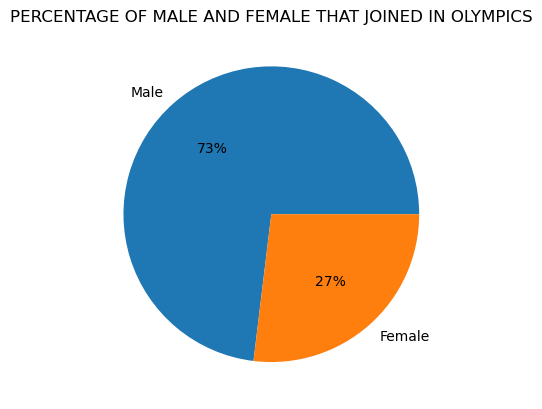

In [32]:
gender = df.groupby('Sex')['count'].sum().sort_values(ascending=False)
plt.pie(gender, labels=gender.index,autopct='%.0f%%')
plt.title("PERCENTAGE OF MALE AND FEMALE THAT JOINED IN OLYMPICS")
plt.show()

# THANKS FOR VIEWING

# MY MOTO IN STUDYING IS STUDY TILL BURN OUT, TIRED AND LACK OF MOTIVATION

# STILL UPSKILLING AND IMPROVING